## Consumer Discretionary Stock Selection Portfolio vs Sector (XLY ETF)

In [22]:
from yahoofinancials import YahooFinancials
import numpy as np
import datetime
import hvplot.pandas
from pathlib import Path
from pandas_datareader import data as pdr
import pandas as pd

import matplotlib 
%matplotlib inline



In [24]:
start_sp = datetime.datetime(2018, 12, 31)
end_sp = datetime.datetime(2019, 12, 31)

ticker_symbols_list = ['AMZN','HD','MCD','SBUX','BKNG','TJX','TGT','ROST','F','ORLY','YUM','AZO','EBAY',
'APTV','RCL','CMG','LVS','DHI','CCL','GPC','TIF','DRI','EXPE','ULTA','HAS','NVR','NCLH','TSCO',
'AAP','LKQ','MHK','TPR','PVH','LEG','CPRI','RL']

close_price_df = pdr.get_data_yahoo(ticker_symbols_list, start_sp, end_sp)['Close']
XLY_price_df = pdr.get_data_yahoo('XLY', start_sp, end_sp)['Close']

multpl_stock_returns = close_price_df.pct_change()
XLY_returns = pd.DataFrame(XLY_price_df).pct_change()



In [26]:
multpl_stock_returns.head()
# Set weights, use the `dot` function to multiply each weight by the corresponding stock daily return
weights = [0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028]
portfolio_returns =  multpl_stock_returns.dot(weights)
portfolio_returns = pd.DataFrame(portfolio_returns)
portfolio_returns = portfolio_returns.rename(columns={0:"Portfolio_Returns"}) 
portfolio_returns.head()


,Portfolio_Returns
Date,
2018-12-31,NaN
2019-01-02,0.006459
2019-01-03,-0.021486
2019-01-04,0.031853
2019-01-07,0.021070


In [27]:
XLY_df = XLY_returns.rename(columns={'Close':"XLY_Returns"}) 
XLY_df.head()

,XLY_Returns
Date,
2018-12-31,NaN
2019-01-02,0.007575
2019-01-03,-0.021652
2019-01-04,0.033094
2019-01-07,0.022612


In [28]:
stock_returns = close_price_df.resample('Y').ffill().pct_change().dropna()
XLY_return = XLY_price_df.resample('Y').ffill().pct_change().dropna()

weights = [0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028]
portfolio_return =  stock_returns.dot(weights)
print(portfolio_return)
print(XLY_return)

Date
2019-12-31    0.288024
Freq: A-DEC, dtype: float64
Date
2019-12-31    0.258812
Freq: A-DEC, Name: Close, dtype: float64


In [29]:
combined_df = pd.concat([portfolio_returns, XLY_df],axis='columns', join='inner')
combined_df['Active_Return']=combined_df['Portfolio_Returns'] - combined_df['XLY_Returns']
combined_df = combined_df.dropna()
combined_df.head()

,Portfolio_Returns,XLY_Returns,Active_Return
Date,,,
2019-01-02,0.006459,0.007575,-0.001116
2019-01-03,-0.021486,-0.021652,0.000166
2019-01-04,0.031853,0.033094,-0.001241
2019-01-07,0.021070,0.022612,-0.001542
2019-01-08,0.012580,0.011056,0.001523


### Calculating `tracking error` 

In [30]:
active_list = combined_df['Active_Return']
temp_ = []
count = 0 

for i in range(len(active_list)):
    x = active_list[i]**2
    active_return = i 
    temp_.append(x)
    count = 0 + i 
tracking_error = round(np.sqrt(sum(temp_)/(count-1))*100,2)
print(f"Tracking Error: {tracking_error}%")

#information_ratio = round((combined_df['Active_Return'].mean() * 252) / (tracking_error),2)
#print(f"Information Ratio: {information_ratio}")

Tracking Error: 0.36%


In [31]:
portfolio_cumulative_returns = (1+combined_df['Portfolio_Returns']).cumprod()
XLY_cumulative_returns = (1+combined_df['XLY_Returns']).cumprod()
port_return = round((portfolio_cumulative_returns[-1]-1)*100,2)
XLY_return = round((XLY_cumulative_returns[-1]-1)*100,2)

print(f'Portfolio YTD return: {port_return}%')
print(f'XLY YTD return: {XLY_return}%')

Portfolio YTD return: 30.4%
XLY YTD return: 25.88%


Consumer Discretionary Portfolio Relative Performance YTD: 4.52%


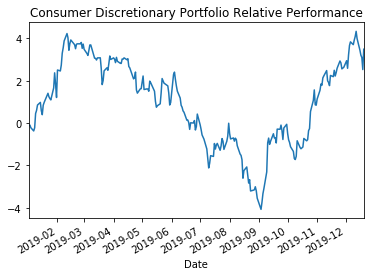

In [32]:
active_cumulative_returns = ((1+combined_df['Active_Return']).cumprod()-1)*100
performance = round(port_return - XLY_return, 2)
print(f"Consumer Discretionary Portfolio Relative Performance YTD: {performance}%")
mc = active_cumulative_returns.plot(title='Consumer Discretionary Portfolio Relative Performance')
mc

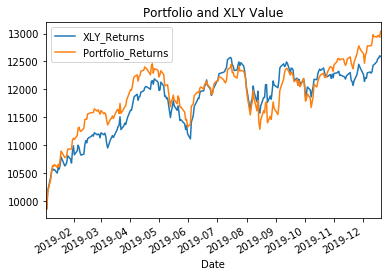

In [33]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
portfolio_cumulative_profit = initial_investment * portfolio_cumulative_returns
XLY_cumulative_profit = initial_investment * XLY_cumulative_returns

XLY_cumulative_profit.plot(title='Portfolio and XLY Value', legend=True)
portfolio_cumulative_profit.plot(title='Portfolio and XLY Value', legend=True)


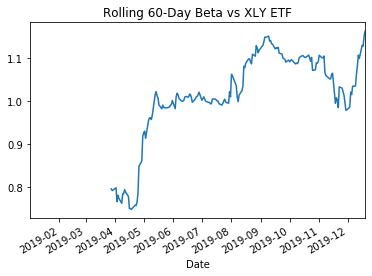

In [14]:
    rolling_covariance_port =  combined_df["Portfolio_Returns"].rolling(window=60).cov(combined_df["XLY_Returns"])
    rolling_variance =  combined_df["XLY_Returns"].rolling(window=60).var()
    rolling_portfolio_beta = rolling_covariance_port / rolling_variance
    mc = rolling_portfolio_beta.plot(x='Date', y='0', title='Rolling 60-Day Beta vs XLY ETF')
    mc

In [15]:
import math
import numpy
import numpy.random as nrand

port_returns = portfolio_returns['Portfolio_Returns']

def prices(returns, base):
    # Converts returns into prices
    s = [base]
    for i in range(len(returns)):
        s.append(base * (1 + returns[i]))
    return numpy.array(s)

def dd(returns, tau):
    # Returns the draw-down given time period tau
    values = prices(returns, 100)
    pos = len(values) - 1
    pre = pos - tau
    drawdown = float('+inf')
    # Find the maximum drawdown given tau
    while pre >= 0:
        dd_i = (values[pos] / values[pre]) - 1
        if dd_i < drawdown:
            drawdown = dd_i
        pos, pre = pos - 1, pre - 1
    # Drawdown should be positive
    return abs(drawdown)


def max_dd(returns):
    # Returns the maximum draw-down for any tau in (0, T) where T is the length of the return series
    max_drawdown = float('-inf')
    for i in range(0, len(returns)):
        drawdown_i = dd(returns, i)
        if drawdown_i > max_drawdown:
            max_drawdown = drawdown_i
    # Max draw-down should be positive
    return abs(max_drawdown)

In [16]:
max_drawdown = round(max_dd(port_returns)*100,2)
print(f"Maximum Drawdown: {max_drawdown}%")

Maximum Drawdown: 7.0%
